<a href="https://colab.research.google.com/github/hagarbarakat/Pattern-Recognition/blob/master/Sheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eigh
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math

**Data Matrix**

a. Compute the norm of each instance. (5x1)

b. Compute the Cosine similarity matrix (5x5)
matrix

c. Compute the Euclidean Distance matrix of
the instances (5x5)


In [2]:
# Data Matrix 
A = np.array([[10,60,10,90],[20, 50, 40, 70],[30, 50, 30, 40],[20, 50, 20, 60],[10, 60, 30, 10]])
#Norm of each instance -> 5x1
norm = np.linalg.norm(A, axis = 1)
# another way to compute norm
n = np.sqrt(np.sum(A*A, axis = 1))
print(n)
print(norm)
#Cosine similarity matrix -> 5x5
print(cosine_similarity(A))
#Euclidean distance matrix -> 5x5
print(euclidean_distances(A))

[109.08712115  96.95359715  76.81145748  83.06623863  68.556546  ]
[109.08712115  96.95359715  76.81145748  83.06623863  68.556546  ]
[[1.         0.93604728 0.85927665 0.97114627 0.65519967]
 [0.93604728 1.         0.95338522 0.98093136 0.76728608]
 [0.85927665 0.95338522 1.         0.95604709 0.8735402 ]
 [0.97114627 0.98093136 0.95604709 1.         0.77264358]
 [0.65519967 0.76728608 0.8735402  0.77264358 1.        ]]
[[ 0.         38.72983346 58.30951895 34.64101615 82.46211251]
 [38.72983346  0.         33.1662479  22.36067977 62.44997998]
 [58.30951895 33.1662479   0.         24.49489743 37.41657387]
 [34.64101615 22.36067977 24.49489743  0.         52.91502622]
 [82.46211251 62.44997998 37.41657387 52.91502622  0.        ]]


 **Principal Component Analysis**



Matrix A
 [[10 60 90]
 [20 50 70]
 [30 50 40]
 [20 50 60]
 [10 60 10]]


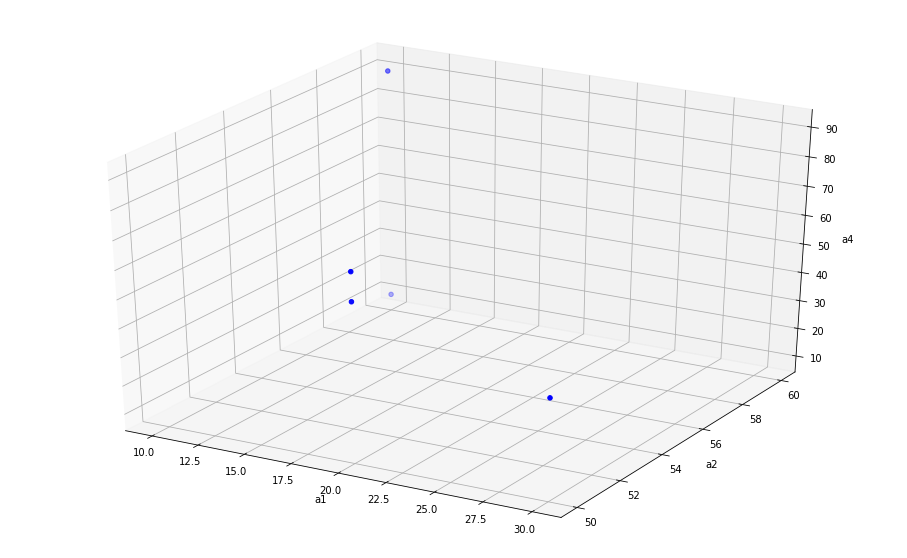


mean  [18. 54. 54.]

Matrix Z
 [[ -8.   6.  36.]
 [  2.  -4.  16.]
 [ 12.  -4. -14.]
 [  2.  -4.   6.]
 [ -8.   6. -44.]]
4

COV
 [[ 70. -40. -15.]
 [-40.  30. -20.]
 [-15. -20. 930.]]

Covariance:
 [[ 70. -40. -15.]
 [-40.  30. -20.]
 [-15. -20. 930.]]

Eigenvalues (Σ):
 [  4.60865707  94.71537456 930.67596837]

Eigenvectors (Σ):
 [[ 0.52611085  0.85025739 -0.01642407]
 [ 0.8499905  -0.5263604  -0.02146802]
 [ 0.02689832  0.00266574  0.99963462]]

Eigenvalues in descending order:
930.6759683698364
94.71537456463865
4.60865706552501

 Verify UTΛU= COV 
 [[ 70. -40. -15.]
 [-40.  30. -20.]
 [-15. -20. 930.]]
1030.0

Explained Variance =  90.35689013299381 %


In [3]:
# Data Matrix -> Consider a1, a2 and a4 only
A = np.array([[10,60,90],[20, 50, 70],[30, 50, 40],[20, 50, 60],[10, 60, 10]])
# 1) Write down the new data matrix D3 (5x3)
print("Matrix A\n", A)
# 2) Plot the data using 3d scatter plots
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter(A[:, 0], A[:, 1], A[:, 2],
                        color="blue")
ax.set_xlabel("a1")
ax.set_ylabel("a2")
ax.set_zlabel("a4")
plt.show()
# 3) Compute the mean vector (3x1)
mean = np.mean(A, axis = 0)
print("\nmean ",mean)
# 4) Compute centered data matrix Z by subtracting mean vector fromthe Data Matrix. (5x3)
Z = A - mean
print("\nMatrix Z\n",Z)
# 5) Compute Covariance matrix COV (3x3)
print(A.shape[0]-1)
COV = (np.transpose(Z).dot(Z)) / (A.shape[0]-1)
print("\nCOV\n", COV)
covariance = np.cov(Z.T)
print("\nCovariance:\n", covariance)
# 6) Use python solvers to find eigenvalues (Diagonal 3x3 matrix) and eigenvectors (3x3) matrix. Take care of the eigenvalues order.
# Σ stands for covariance matrix
val, vec = eigh(covariance)
print("\nEigenvalues (Σ):\n", val)
print("\nEigenvectors (Σ):\n",vec)
# Sorting Descendingly 
eig_pairs = [(np.abs(val[i]), vec[:,i]) for i in range(len(val))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('\nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
# 7) Verify UTΛU= COV.
values = np.array([[val[0], 0, 0], [0, val[1], 0],[0, 0, val[2]]])
#print(values)
verify = vec.dot(values).dot(vec.T)
print("\n Verify UTΛU= COV \n",verify)
# 8) Compute the explained variance by the eigenvector corresponding
#to the largest eigenvalue. Do you think one eigenvector is good
#enough?
tot = sum(val)
#tot = sum(val)
var_exp = (eig_pairs[0][0]/ tot)*100
print("\nExplained Variance = ", var_exp, "%")

**Do you think one eigenvector is good enough?**

     Not enough as it is less than 95%




Number of reduced dimensions: 2
Matrix P:
 [[-0.01642407  0.85025739]
 [-0.02146802 -0.5263604 ]
 [ 0.99963462  0.00266574]]

2D:
 [[ 35.98943074  -9.8642548 ]
 [ 16.04717787   3.84860823]
 [-14.10610139  12.27120986]
 [  6.05083167   3.82195082]
 [-43.98133889 -10.07751411]] 



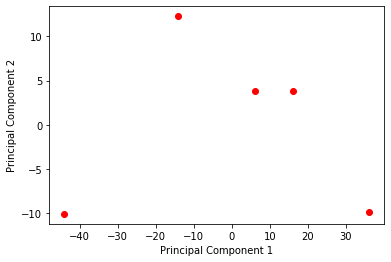

In [11]:
# to get minimum number of eigenvectors which are good enough 
i = 0
current_sum = 0
for x in eig_pairs:
  if current_sum/tot < 0.95:
    current_sum = current_sum + x[0]
    i = i+1
print("Number of reduced dimensions:", i) 
# 9) Compute the projection matrix P to go to 2-dimensions. Consider the top two eigenvectors of matrix U according to eigenvalues.(3x2)
P = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix P:\n', P)
# 10) Project the instances into a 2-Dimension space. xນ= PTx
s = P.T.dot(Z.T)
s = s.T
print("\n2D:\n",s, "\n")
# 11) Plot the resulting Data matrix D2 using scatter plots.
plt.scatter(s[:,0], s[:,1], c="red")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


4. We have 4 data points. The following is their data matrix, on which we
want to apply the PCA.

In [47]:
# Data Matrix 
A = np.array([[6,-4],[-3, 5],[-2, 6],[7,-3]])
print("\nMatrix:\n", A)
# a. Compute the mean and the covariance of the given data matrix.
# mean
mean = np.mean(A, axis = 0)
print("\nmean ",mean)
Z = A - mean
#covariance 
covariance = np.cov(np.transpose(Z))
print("\nCovariance:\n", covariance)

# b. Knowing that the unit eigenvectors of the covariance matrix are
#(1/√2, 1/√2) with eigenvalue = 2 and (-1/√2, 1/√2) with eigenvalue = 162, find the first principal component of the PCA.
values = np.array([[2,0],[0,162]])
vectors = np.array([[1/math.sqrt(2), 1/math.sqrt(2)],[-1/math.sqrt(2), 1/math.sqrt(2)]])
s = vectors.T.dot(Z.T)
s = s.T
print("\n2D:\n",s, "\n")
print("As Eigenvalue that equals 162 is larger, therefore this values will be assigned to the first component of the PCA.")
print("\nfirst principal component of the PCA:\n", s[:,1])


Matrix:
 [[ 6 -4]
 [-3  5]
 [-2  6]
 [ 7 -3]]

mean  [2. 1.]

Covariance:
 [[ 27.33333333 -26.66666667]
 [-26.66666667  27.33333333]]

2D:
 [[ 6.36396103 -0.70710678]
 [-6.36396103 -0.70710678]
 [-6.36396103  0.70710678]
 [ 6.36396103  0.70710678]] 

As Eigenvalue that equals 162 is larger, therefore this values will be assigned to the first component of the PCA.

first principal component of the PCA:
 [-0.70710678 -0.70710678  0.70710678  0.70710678]
